In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "./data_test/"

In [4]:
sz=224

In [5]:
!ls {PATH}

models	tmp  train  valid


In [6]:
!ls {PATH}valid

bender	homer


In [7]:
files = !ls {PATH}valid/bender | head
files

['bender.11.jpg',
 'bender.12.jpg',
 'bender.13.jpg',
 'bender.14.jpg',
 'bender.15.jpg',
 'bender.16.jpg',
 'bender.17.jpg',
 'bender.18.jpg',
 'bender.19.jpg',
 'bender.20.jpg']

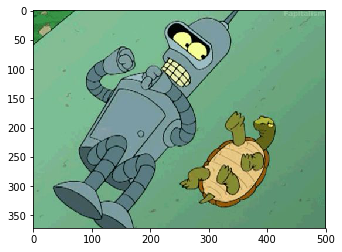

In [8]:
# https://matplotlib.org/users/image_tutorial.html
img = plt.imread(f'{PATH}valid/bender/{files[0]}')
plt.imshow(img);

In [9]:
img.shape

(372, 500, 3)

In [10]:
img[:4,:4]

array([[[ 58, 130,  57],
        [ 66, 139,  66],
        [ 63, 141,  65],
        [ 48, 131,  53]],

       [[ 69, 142,  71],
        [ 62, 138,  64],
        [ 57, 135,  60],
        [ 51, 133,  57]],

       [[ 67, 142,  73],
        [ 54, 131,  61],
        [ 50, 130,  57],
        [ 56, 140,  65]],

       [[ 34, 113,  47],
        [ 34, 114,  45],
        [ 45, 126,  57],
        [ 59, 142,  70]]], dtype=uint8)

In [11]:
# Uncomment the below if you need to reset your precomputed activations
!rm -rf {PATH}tmp

In [12]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [13]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 50)

100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


HBox(children=(IntProgress(value=0, description='Epoch', max=50), HTML(value='')))

[ 0.       0.77365  0.68154  0.5    ]                    
[ 1.       0.63511  0.66465  0.6    ]            
[ 2.       0.59251  0.65373  0.65   ]            
[ 3.      0.5143  0.6481  0.7   ]                
[ 4.       0.44629  0.65447  0.75   ]            
[ 5.       0.38854  0.65422  0.75   ]            
[ 6.       0.34048  0.65316  0.75   ]           
[ 7.       0.30393  0.65312  0.8    ]            
[ 8.       0.26947  0.64882  0.8    ]            
[ 9.       0.24187  0.64644  0.8    ]            
[ 10.        0.21878   0.65286   0.8    ]        
[ 11.        0.19959   0.6539    0.8    ]      
[ 12.        0.18312   0.65154   0.8    ]        
[ 13.        0.16847   0.64778   0.8    ]        
[ 14.        0.1565    0.64337   0.8    ]        
[ 15.        0.14543   0.64299   0.8    ]        
[ 16.        0.13562   0.64204   0.8    ]        
[ 17.        0.12683   0.64284   0.8    ]        
[ 18.        0.11913   0.63762   0.8    ]        
[ 19.        0.11205   0.63305   0.75   ]    

In [14]:
learn.save('model')

In [15]:
learn.load('model')

In [16]:
# This is the label for a val data
data.val_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['bender', 'homer']

In [18]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(20, 2)

In [19]:
log_preds[:10]

array([[-0.00529, -5.24443],
       [-0.95308, -0.48703],
       [-0.02095, -3.87591],
       [-0.81832, -0.58192],
       [-0.08918, -2.46134],
       [-0.00156, -6.46672],
       [-0.03495, -3.37137],
       [-0.24249, -1.5356 ],
       [-0.0052 , -5.26122],
       [-0.08109, -2.55244]], dtype=float32)

In [20]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])   

In [21]:
def rand_by_mask(mask): 
    return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): 
    return rand_by_mask((preds == data.val_y)==is_correct)

In [22]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [23]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [24]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


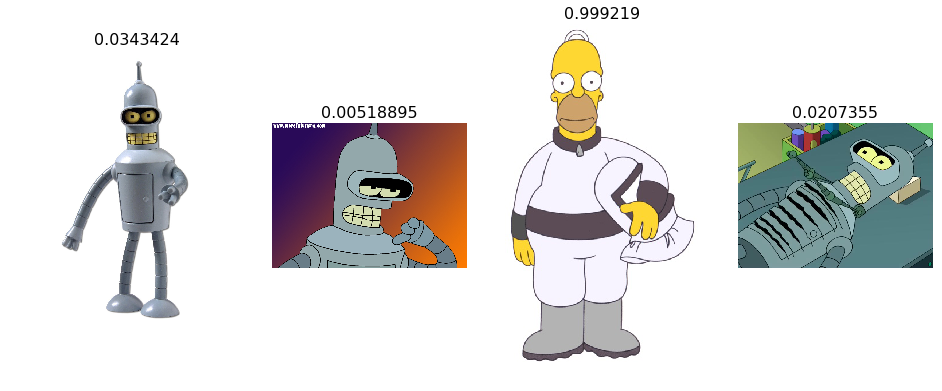

In [25]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


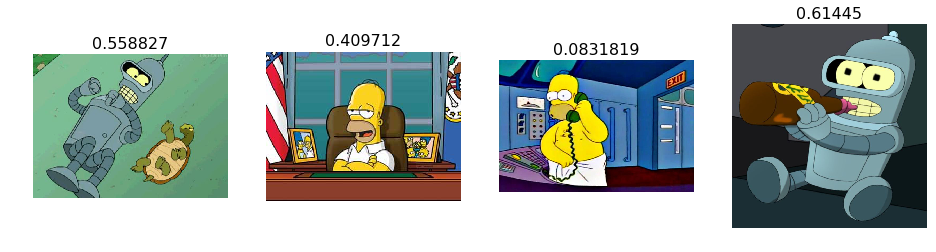

In [26]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [27]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct bender


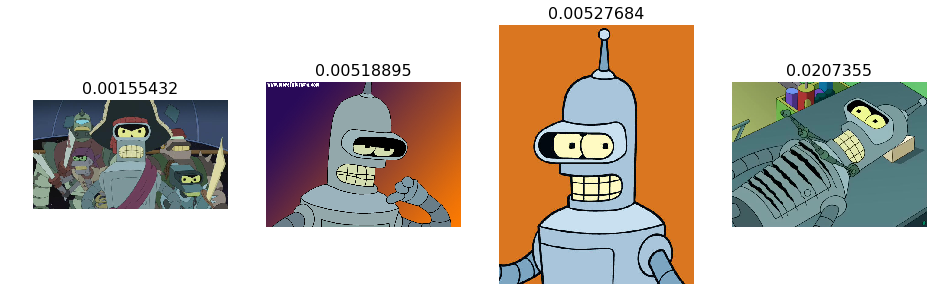

In [28]:
plot_val_with_title(most_by_correct(0, True), "Most correct bender")

Most correct homer


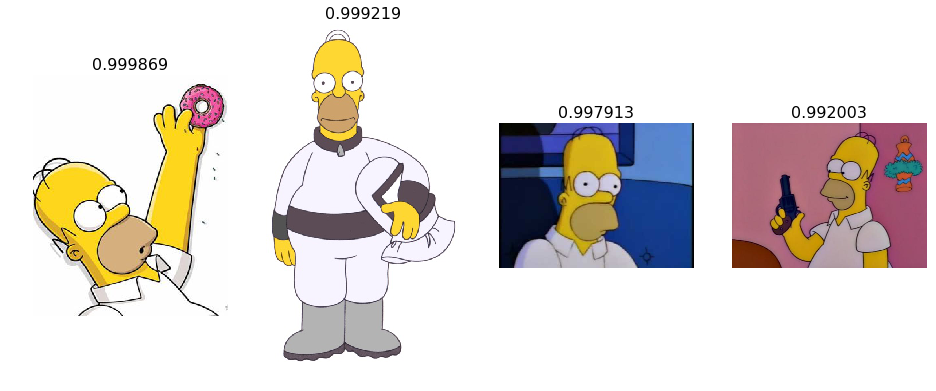

In [29]:
plot_val_with_title(most_by_correct(1, True), "Most correct homer")

Most incorrect bender


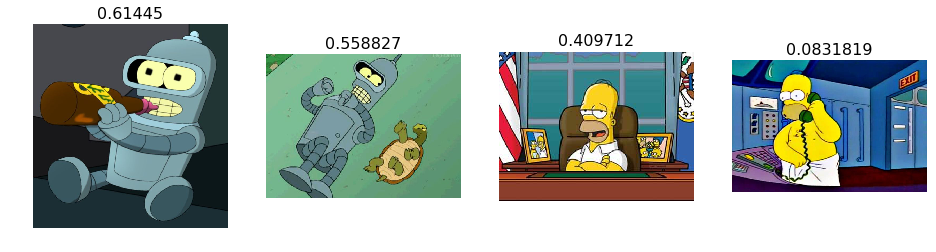

In [30]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect bender")

Most incorrect homer


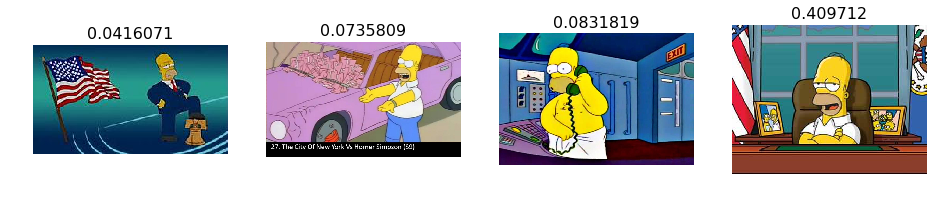

In [31]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect homer")

Most uncertain predictions


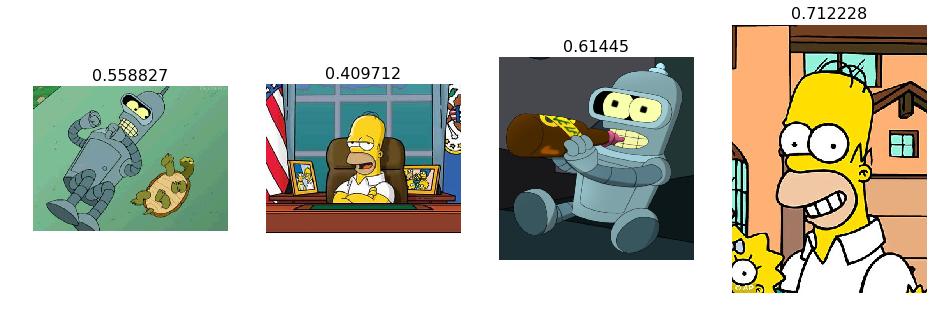

In [32]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")